# PRE-PROCESSING

In [41]:
import pandas as pd
import os
import librosa
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns
audio_dataset_path='../AUDIO_PATTERN'
metadata=pd.read_excel('../AUDIO_PATTERN/dataset_industrial.xlsx')
metadata.head()

,AUDIO_NAME,CLASS
0,02ABNORMAL_FAN_00000000.wav,ABNORMAL_FAN
1,02ABNORMAL_FAN_00000001.wav,ABNORMAL_FAN
2,02ABNORMAL_FAN_00000002.wav,ABNORMAL_FAN
3,02ABNORMAL_FAN_00000003.wav,ABNORMAL_FAN
4,02ABNORMAL_FAN_00000004.wav,ABNORMAL_FAN


In [2]:
len(metadata)

2467

In [3]:
#### Extracting MFCC's For every audio file
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features,axis=1)
    return mfccs_scaled_features

In [4]:
file_list=["../AUDIO_PATTERN/abnormal_fan358.wav","../AUDIO_PATTERN/normal_fan1015.wav","../AUDIO_PATTERN/normal_pump1004.wav","../AUDIO_PATTERN/abnormal_pump109.wav"]

In [5]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
i=0
extracted_features=[]
while i<len(metadata):
    #print(metadata.loc[i]['AUDIO_NAME'])
    #print(metadata.loc[i]['CLASS'])
    file_name="../AUDIO_PATTERN/AUDIO_DATASET/"+metadata.loc[i]['AUDIO_NAME']
    file_class=metadata.loc[i]['CLASS']
    data=features_extractor(file_name)
    extracted_features.append([data,file_class])
    print(metadata.loc[i]['AUDIO_NAME'])
    i=i+1

02ABNORMAL_FAN_00000000.wav
02ABNORMAL_FAN_00000001.wav
02ABNORMAL_FAN_00000002.wav
02ABNORMAL_FAN_00000003.wav
02ABNORMAL_FAN_00000004.wav
02ABNORMAL_FAN_00000005.wav
02ABNORMAL_FAN_00000006.wav
02ABNORMAL_FAN_00000007.wav
02ABNORMAL_FAN_00000008.wav
02ABNORMAL_FAN_00000009.wav
02ABNORMAL_FAN_00000010.wav
02ABNORMAL_FAN_00000011.wav
02ABNORMAL_FAN_00000012.wav
02ABNORMAL_FAN_00000013.wav
02ABNORMAL_FAN_00000014.wav
02ABNORMAL_FAN_00000015.wav
02ABNORMAL_FAN_00000016.wav
02ABNORMAL_FAN_00000017.wav
02ABNORMAL_FAN_00000018.wav
02ABNORMAL_FAN_00000019.wav
02ABNORMAL_FAN_00000020.wav
02ABNORMAL_FAN_00000021.wav
02ABNORMAL_FAN_00000022.wav
02ABNORMAL_FAN_00000023.wav
02ABNORMAL_FAN_00000024.wav
02ABNORMAL_FAN_00000025.wav
02ABNORMAL_FAN_00000026.wav
02ABNORMAL_FAN_00000027.wav
02ABNORMAL_FAN_00000028.wav
02ABNORMAL_FAN_00000029.wav
02ABNORMAL_FAN_00000030.wav
02ABNORMAL_FAN_00000031.wav
02ABNORMAL_FAN_00000032.wav
02ABNORMAL_FAN_00000033.wav
02ABNORMAL_FAN_00000034.wav
02ABNORMAL_FAN_00000

02ABNORMAL_FAN_00000294.wav
02ABNORMAL_FAN_00000295.wav
02ABNORMAL_FAN_00000296.wav
02ABNORMAL_FAN_00000297.wav
02ABNORMAL_FAN_00000298.wav
02ABNORMAL_FAN_00000299.wav
02ABNORMAL_FAN_00000300.wav
02ABNORMAL_FAN_00000301.wav
02ABNORMAL_FAN_00000302.wav
02ABNORMAL_FAN_00000303.wav
02ABNORMAL_FAN_00000304.wav
02ABNORMAL_FAN_00000305.wav
02ABNORMAL_FAN_00000306.wav
02ABNORMAL_FAN_00000307.wav
02ABNORMAL_FAN_00000308.wav
02ABNORMAL_FAN_00000309.wav
02ABNORMAL_FAN_00000310.wav
02ABNORMAL_FAN_00000311.wav
02ABNORMAL_FAN_00000312.wav
02ABNORMAL_FAN_00000313.wav
02ABNORMAL_FAN_00000314.wav
02ABNORMAL_FAN_00000315.wav
02ABNORMAL_FAN_00000316.wav
02ABNORMAL_FAN_00000317.wav
02ABNORMAL_FAN_00000318.wav
02ABNORMAL_FAN_00000319.wav
02ABNORMAL_FAN_00000320.wav
02ABNORMAL_FAN_00000321.wav
02ABNORMAL_FAN_00000322.wav
02ABNORMAL_FAN_00000323.wav
02ABNORMAL_FAN_00000324.wav
02ABNORMAL_FAN_00000325.wav
02ABNORMAL_FAN_00000326.wav
02ABNORMAL_FAN_00000327.wav
02ABNORMAL_FAN_00000328.wav
02ABNORMAL_FAN_00000

02NORMAL_FAN_00000133.wav
02NORMAL_FAN_00000134.wav
02NORMAL_FAN_00000135.wav
02NORMAL_FAN_00000136.wav
02NORMAL_FAN_00000137.wav
02NORMAL_FAN_00000138.wav
02NORMAL_FAN_00000139.wav
02NORMAL_FAN_00000140.wav
02NORMAL_FAN_00000141.wav
02NORMAL_FAN_00000142.wav
02NORMAL_FAN_00000143.wav
02NORMAL_FAN_00000144.wav
02NORMAL_FAN_00000145.wav
02NORMAL_FAN_00000146.wav
02NORMAL_FAN_00000147.wav
02NORMAL_FAN_00000148.wav
02NORMAL_FAN_00000149.wav
02NORMAL_FAN_00000150.wav
02NORMAL_FAN_00000151.wav
02NORMAL_FAN_00000152.wav
02NORMAL_FAN_00000153.wav
02NORMAL_FAN_00000154.wav
02NORMAL_FAN_00000155.wav
02NORMAL_FAN_00000156.wav
02NORMAL_FAN_00000157.wav
02NORMAL_FAN_00000158.wav
02NORMAL_FAN_00000159.wav
02NORMAL_FAN_00000160.wav
02NORMAL_FAN_00000161.wav
02NORMAL_FAN_00000162.wav
02NORMAL_FAN_00000163.wav
02NORMAL_FAN_00000164.wav
02NORMAL_FAN_00000165.wav
02NORMAL_FAN_00000166.wav
02NORMAL_FAN_00000167.wav
02NORMAL_FAN_00000168.wav
02NORMAL_FAN_00000169.wav
02NORMAL_FAN_00000170.wav
02NORMAL_FAN

02NORMAL_FAN_00000449.wav
02NORMAL_FAN_00000450.wav
02NORMAL_FAN_00000451.wav
02NORMAL_FAN_00000452.wav
02NORMAL_FAN_00000453.wav
02NORMAL_FAN_00000454.wav
02NORMAL_FAN_00000455.wav
02NORMAL_FAN_00000456.wav
02NORMAL_FAN_00000457.wav
02NORMAL_FAN_00000458.wav
02NORMAL_FAN_00000459.wav
02NORMAL_FAN_00000460.wav
02NORMAL_FAN_00000461.wav
02NORMAL_FAN_00000462.wav
02NORMAL_FAN_00000463.wav
02NORMAL_FAN_00000464.wav
02NORMAL_FAN_00000465.wav
02NORMAL_FAN_00000466.wav
02NORMAL_FAN_00000467.wav
02NORMAL_FAN_00000468.wav
02NORMAL_FAN_00000469.wav
02NORMAL_FAN_00000470.wav
02NORMAL_FAN_00000471.wav
02NORMAL_FAN_00000472.wav
02NORMAL_FAN_00000473.wav
02NORMAL_FAN_00000474.wav
02NORMAL_FAN_00000475.wav
02NORMAL_FAN_00000476.wav
02NORMAL_FAN_00000477.wav
02NORMAL_FAN_00000478.wav
02NORMAL_FAN_00000479.wav
02NORMAL_FAN_00000480.wav
02NORMAL_FAN_00000481.wav
02NORMAL_FAN_00000482.wav
02NORMAL_FAN_00000483.wav
02NORMAL_FAN_00000484.wav
02NORMAL_FAN_00000485.wav
02NORMAL_FAN_00000486.wav
02NORMAL_FAN

02NORMAL_FAN_00000765.wav
02NORMAL_FAN_00000766.wav
02NORMAL_FAN_00000767.wav
02NORMAL_FAN_00000768.wav
02NORMAL_FAN_00000769.wav
02NORMAL_FAN_00000770.wav
02NORMAL_FAN_00000771.wav
02NORMAL_FAN_00000772.wav
02NORMAL_FAN_00000773.wav
02NORMAL_FAN_00000774.wav
02NORMAL_FAN_00000775.wav
02NORMAL_FAN_00000776.wav
02NORMAL_FAN_00000777.wav
02NORMAL_FAN_00000778.wav
02NORMAL_FAN_00000779.wav
02NORMAL_FAN_00000780.wav
02NORMAL_FAN_00000781.wav
02NORMAL_FAN_00000782.wav
02NORMAL_FAN_00000783.wav
02NORMAL_FAN_00000784.wav
02NORMAL_FAN_00000785.wav
02NORMAL_FAN_00000786.wav
02NORMAL_FAN_00000787.wav
02NORMAL_FAN_00000788.wav
02NORMAL_FAN_00000789.wav
02NORMAL_FAN_00000790.wav
02NORMAL_FAN_00000791.wav
02NORMAL_FAN_00000792.wav
02NORMAL_FAN_00000793.wav
02NORMAL_FAN_00000794.wav
02NORMAL_FAN_00000795.wav
02NORMAL_FAN_00000796.wav
02NORMAL_FAN_00000797.wav
02NORMAL_FAN_00000798.wav
02NORMAL_FAN_00000799.wav
02NORMAL_FAN_00000800.wav
02NORMAL_FAN_00000801.wav
02NORMAL_FAN_00000802.wav
02NORMAL_FAN

02NORMAL_PUMP_00000072.wav
02NORMAL_PUMP_00000073.wav
02NORMAL_PUMP_00000074.wav
02NORMAL_PUMP_00000075.wav
02NORMAL_PUMP_00000076.wav
02NORMAL_PUMP_00000077.wav
02NORMAL_PUMP_00000078.wav
02NORMAL_PUMP_00000079.wav
02NORMAL_PUMP_00000080.wav
02NORMAL_PUMP_00000081.wav
02NORMAL_PUMP_00000082.wav
02NORMAL_PUMP_00000083.wav
02NORMAL_PUMP_00000084.wav
02NORMAL_PUMP_00000085.wav
02NORMAL_PUMP_00000086.wav
02NORMAL_PUMP_00000087.wav
02NORMAL_PUMP_00000088.wav
02NORMAL_PUMP_00000089.wav
02NORMAL_PUMP_00000090.wav
02NORMAL_PUMP_00000091.wav
02NORMAL_PUMP_00000092.wav
02NORMAL_PUMP_00000093.wav
02NORMAL_PUMP_00000094.wav
02NORMAL_PUMP_00000095.wav
02NORMAL_PUMP_00000096.wav
02NORMAL_PUMP_00000097.wav
02NORMAL_PUMP_00000098.wav
02NORMAL_PUMP_00000099.wav
02NORMAL_PUMP_00000100.wav
02NORMAL_PUMP_00000101.wav
02NORMAL_PUMP_00000102.wav
02NORMAL_PUMP_00000103.wav
02NORMAL_PUMP_00000104.wav
02NORMAL_PUMP_00000105.wav
02NORMAL_PUMP_00000106.wav
02NORMAL_PUMP_00000107.wav
02NORMAL_PUMP_00000108.wav
0

02NORMAL_PUMP_00000376.wav
02NORMAL_PUMP_00000377.wav
02NORMAL_PUMP_00000378.wav
02NORMAL_PUMP_00000379.wav
02NORMAL_PUMP_00000380.wav
02NORMAL_PUMP_00000381.wav
02NORMAL_PUMP_00000382.wav
02NORMAL_PUMP_00000383.wav
02NORMAL_PUMP_00000384.wav
02NORMAL_PUMP_00000385.wav
02NORMAL_PUMP_00000386.wav
02NORMAL_PUMP_00000387.wav
02NORMAL_PUMP_00000388.wav
02NORMAL_PUMP_00000389.wav
02NORMAL_PUMP_00000390.wav
02NORMAL_PUMP_00000391.wav
02NORMAL_PUMP_00000392.wav
02NORMAL_PUMP_00000393.wav
02NORMAL_PUMP_00000394.wav
02NORMAL_PUMP_00000395.wav
02NORMAL_PUMP_00000396.wav
02NORMAL_PUMP_00000397.wav
02NORMAL_PUMP_00000398.wav
02NORMAL_PUMP_00000399.wav
02NORMAL_PUMP_00000400.wav
02NORMAL_PUMP_00000401.wav
02NORMAL_PUMP_00000402.wav
02NORMAL_PUMP_00000403.wav
02NORMAL_PUMP_00000404.wav
02NORMAL_PUMP_00000405.wav
02NORMAL_PUMP_00000406.wav
02NORMAL_PUMP_00000407.wav
02NORMAL_PUMP_00000408.wav
02NORMAL_PUMP_00000409.wav
02NORMAL_PUMP_00000410.wav
02NORMAL_PUMP_00000411.wav
02NORMAL_PUMP_00000412.wav
0

02NORMAL_PUMP_00000680.wav
02NORMAL_PUMP_00000681.wav
02NORMAL_PUMP_00000682.wav
02NORMAL_PUMP_00000683.wav
02NORMAL_PUMP_00000684.wav
02NORMAL_PUMP_00000685.wav
02NORMAL_PUMP_00000686.wav
02NORMAL_PUMP_00000687.wav
02NORMAL_PUMP_00000688.wav
02NORMAL_PUMP_00000689.wav
02NORMAL_PUMP_00000690.wav
02NORMAL_PUMP_00000691.wav
02NORMAL_PUMP_00000692.wav
02NORMAL_PUMP_00000693.wav
02NORMAL_PUMP_00000694.wav
02NORMAL_PUMP_00000695.wav
02NORMAL_PUMP_00000696.wav
02NORMAL_PUMP_00000697.wav
02NORMAL_PUMP_00000698.wav
02NORMAL_PUMP_00000699.wav
02NORMAL_PUMP_00000700.wav
02NORMAL_PUMP_00000701.wav
02NORMAL_PUMP_00000702.wav
02NORMAL_PUMP_00000703.wav
02NORMAL_PUMP_00000704.wav
02NORMAL_PUMP_00000705.wav
02NORMAL_PUMP_00000706.wav
02NORMAL_PUMP_00000707.wav
02NORMAL_PUMP_00000708.wav
02NORMAL_PUMP_00000709.wav
02NORMAL_PUMP_00000710.wav
02NORMAL_PUMP_00000711.wav
02NORMAL_PUMP_00000712.wav
02NORMAL_PUMP_00000713.wav
02NORMAL_PUMP_00000714.wav
02NORMAL_PUMP_00000715.wav
02NORMAL_PUMP_00000716.wav
0

02NORMAL_PUMP_00000984.wav
02NORMAL_PUMP_00000985.wav
02NORMAL_PUMP_00000986.wav
02NORMAL_PUMP_00000987.wav
02NORMAL_PUMP_00000988.wav
02NORMAL_PUMP_00000989.wav
02NORMAL_PUMP_00000990.wav
02NORMAL_PUMP_00000991.wav
02NORMAL_PUMP_00000992.wav
02NORMAL_PUMP_00000993.wav
02NORMAL_PUMP_00000994.wav
02NORMAL_PUMP_00000995.wav
02NORMAL_PUMP_00000996.wav
02NORMAL_PUMP_00000997.wav
02NORMAL_PUMP_00000998.wav
02NORMAL_PUMP_00000999.wav
02NORMAL_PUMP_00001000.wav


In [6]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-382.43802, 184.2928, -40.64044, 50.832497, -...",ABNORMAL_FAN
1,"[-405.48752, 196.34035, -35.610046, 61.458584,...",ABNORMAL_FAN
2,"[-403.62534, 192.62895, -34.3873, 48.865, -20....",ABNORMAL_FAN
3,"[-348.15067, 184.36285, -78.51838, 78.89397, -...",ABNORMAL_FAN
4,"[-392.18805, 192.54347, -43.271065, 55.70349, ...",ABNORMAL_FAN


In [7]:
X=[]
for elem in extracted_features:
    X.append(elem[0])

In [8]:
X=np.asarray(X)

In [9]:
X.shape

(2467, 40)

# K MEAN CLUSTERING

2467
[0 1 2 3]


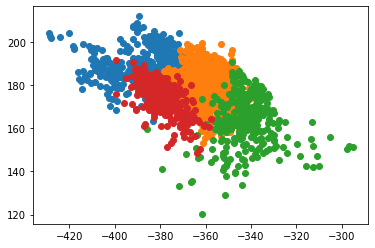

In [10]:
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from matplotlib import pyplot
model = KMeans(n_clusters=4)
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
print(len(yhat))
clusters = unique(yhat)
print(clusters)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

In [11]:
extracted_features_df[extracted_features_df['class']=="ABNORMAL_FAN"].head()

,feature,class
0,"[-382.43802, 184.2928, -40.64044, 50.832497, -...",ABNORMAL_FAN
1,"[-405.48752, 196.34035, -35.610046, 61.458584,...",ABNORMAL_FAN
2,"[-403.62534, 192.62895, -34.3873, 48.865, -20....",ABNORMAL_FAN
3,"[-348.15067, 184.36285, -78.51838, 78.89397, -...",ABNORMAL_FAN
4,"[-392.18805, 192.54347, -43.271065, 55.70349, ...",ABNORMAL_FAN


In [12]:
extracted_features_df[extracted_features_df['class']=="NORMAL_FAN"].head()

,feature,class
460,"[-362.96896, 180.65889, -54.34288, 64.652565, ...",NORMAL_FAN
461,"[-361.8175, 167.16708, -48.896683, 69.5977, -3...",NORMAL_FAN
462,"[-356.45566, 186.86043, -63.438442, 72.49122, ...",NORMAL_FAN
463,"[-352.10358, 164.99974, -58.36637, 65.74309, -...",NORMAL_FAN
464,"[-360.39, 187.39517, -66.751724, 66.365845, -3...",NORMAL_FAN


In [13]:
extracted_features_df[extracted_features_df['class']=="ABNORMAL_PUMP"].head()

,feature,class
351,"[-363.77118, 190.64635, -62.8327, 63.626812, -...",ABNORMAL_PUMP
352,"[-380.76578, 179.53146, -53.8094, 50.46379, -4...",ABNORMAL_PUMP
353,"[-359.83966, 189.13885, -64.848724, 63.943645,...",ABNORMAL_PUMP
354,"[-374.93292, 172.41899, -48.820026, 45.04293, ...",ABNORMAL_PUMP
355,"[-365.91278, 192.37126, -59.68672, 61.493263, ...",ABNORMAL_PUMP


In [14]:
extracted_features_df[extracted_features_df['class']=="NORMAL_PUMP"].head()

,feature,class
1466,"[-374.6349, 171.04681, -55.379517, 65.15853, -...",NORMAL_PUMP
1467,"[-378.25812, 198.40523, -55.462994, 62.64202, ...",NORMAL_PUMP
1468,"[-378.07056, 166.33841, -46.845036, 61.72196, ...",NORMAL_PUMP
1469,"[-365.8594, 197.26845, -66.88457, 60.01483, -3...",NORMAL_PUMP
1470,"[-342.68475, 139.12128, -93.87674, 92.3945, -4...",NORMAL_PUMP


In [15]:
extracted_features_df.to_excel('extracted_features.xlsx')

# NEURAL NETWORK

In [130]:
### Split the dataset
X=np.array(extracted_features_df['feature'].tolist())
y_original=np.array(extracted_features_df['class'].tolist())

In [131]:
y_original

array(['ABNORMAL_FAN', 'ABNORMAL_FAN', 'ABNORMAL_FAN', ..., 'NORMAL_PUMP',
       'NORMAL_PUMP', 'NORMAL_PUMP'], dtype='<U13')

In [132]:
X.shape

(2467, 40)

In [133]:
y_original[360]

'ABNORMAL_PUMP'

In [134]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y_original))

In [135]:
y[360]

array([0., 1., 0., 0.], dtype=float32)

In [136]:
#[1,0,0,0]---->abnormal fan------->0
#[0,1,0,0]----->abnormal pump----->1
#[0,0,1,0]---->normal fan--------->2
#[0,0,0,1]----->normal pump------->3

In [137]:
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [138]:
### Train Test Validation Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,train_size=0.9,random_state=0)

In [139]:
print(X_train.shape,X_test.shape,X_valid.shape)

(1775, 40) (494, 40) (198, 40)


In [140]:
print(y_train.shape,y_test.shape)

(1775, 4) (494, 4)


In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [142]:
num_labels=4

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [143]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_68 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_69 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 100)             

In [144]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [145]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
30/56 [===============>..............] - ETA: 0s - loss: 30.5236 - accuracy: 0.3604
Epoch 00001: val_loss improved from inf to 1.53850, saving model to saved_models\audio_classification.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 23.1445 - accuracy: 0.3561 - val_loss: 1.5385 - val_accuracy: 0.3687
Epoch 2/100
31/56 [===============>..............] - ETA: 0s - loss: 8.6720 - accuracy: 0.3538 
Epoch 00002: val_loss improved from 1.53850 to 1.12458, saving model to saved_models\audio_classification.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 7.3855 - accuracy: 0.3668 - val_loss: 1.1246 - val_accuracy: 0.4192
Epoch 3/100
56/56 [==============================] - ETA: 0s - loss: 3.8312 - accuracy: 0.3566
Epoch 00003: val_loss did not improve from 1.12458
56/56 [==============================] - 0s 2ms/step - loss: 3.8312 - accuracy: 0.3566 - val_loss: 1.1767 - val_accuracy: 0.5202
Epoch 4/100
56/56 [==============================] - ETA

Epoch 28/100
30/56 [===============>..............] - ETA: 0s - loss: 0.5575 - accuracy: 0.7885
Epoch 00028: val_loss did not improve from 0.48884
56/56 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7955 - val_loss: 0.4892 - val_accuracy: 0.7828
Epoch 29/100
28/56 [==============>...............] - ETA: 0s - loss: 0.5637 - accuracy: 0.8047
Epoch 00029: val_loss improved from 0.48884 to 0.47613, saving model to saved_models\audio_classification.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.8051 - val_loss: 0.4761 - val_accuracy: 0.8030
Epoch 30/100
31/56 [===============>..............] - ETA: 0s - loss: 0.5880 - accuracy: 0.7994
Epoch 00030: val_loss did not improve from 0.47613
56/56 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.8056 - val_loss: 0.4821 - val_accuracy: 0.7879
Epoch 31/100
29/56 [==============>...............] - ETA: 0s - loss: 0.4964 - accuracy: 0.8265
Epoch 00031: val

30/56 [===============>..............] - ETA: 0s - loss: 0.4679 - accuracy: 0.8292
Epoch 00055: val_loss did not improve from 0.37742
56/56 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8423 - val_loss: 0.3829 - val_accuracy: 0.8333
Epoch 56/100
56/56 [==============================] - ETA: 0s - loss: 0.4506 - accuracy: 0.8383
Epoch 00056: val_loss did not improve from 0.37742
56/56 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8383 - val_loss: 0.4094 - val_accuracy: 0.8283
Epoch 57/100
56/56 [==============================] - ETA: 0s - loss: 0.4348 - accuracy: 0.8428
Epoch 00057: val_loss did not improve from 0.37742
56/56 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8428 - val_loss: 0.3818 - val_accuracy: 0.8384
Epoch 58/100
30/56 [===============>..............] - ETA: 0s - loss: 0.4238 - accuracy: 0.8448
Epoch 00058: val_loss improved from 0.37742 to 0.35688, saving model to saved_models\audi

31/56 [===============>..............] - ETA: 0s - loss: 0.3535 - accuracy: 0.8760
Epoch 00083: val_loss did not improve from 0.23407
56/56 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8783 - val_loss: 0.2499 - val_accuracy: 0.9091
Epoch 84/100
29/56 [==============>...............] - ETA: 0s - loss: 0.3423 - accuracy: 0.8933
Epoch 00084: val_loss did not improve from 0.23407
56/56 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8839 - val_loss: 0.2616 - val_accuracy: 0.8990
Epoch 85/100
31/56 [===============>..............] - ETA: 0s - loss: 0.4083 - accuracy: 0.8589
Epoch 00085: val_loss did not improve from 0.23407
56/56 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8642 - val_loss: 0.2399 - val_accuracy: 0.9242
Epoch 86/100
30/56 [===============>..............] - ETA: 0s - loss: 0.3851 - accuracy: 0.8750
Epoch 00086: val_loss did not improve from 0.23407
56/56 [==============================]

In [146]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9149797558784485


In [147]:
X_test[0]

array([-3.5796463e+02,  1.8961043e+02, -6.2098652e+01,  7.2092407e+01,
       -3.2382702e+01,  3.1411833e+01, -1.8445122e+01,  7.3332334e+00,
        2.5331717e+00, -5.7743053e+00,  1.0519711e+01, -1.3466720e+01,
        9.9178276e+00, -8.9903412e+00,  5.9666481e+00, -3.9362180e+00,
        7.9837060e-01,  2.1903543e+00, -3.4535429e+00,  3.9195938e+00,
       -2.7384710e+00,  5.1453781e+00, -2.0800633e+00,  4.0336766e+00,
       -9.4851077e-02,  1.4104289e+00,  1.8062165e+00, -1.4535928e+00,
       -6.0382932e-01, -3.4885204e+00, -6.0611552e-01, -2.0087116e+00,
        2.9726064e+00, -4.2139187e-01,  6.3986182e-01, -1.4946609e+00,
       -2.1266830e+00, -1.8184613e+00, -3.1802573e+00,  1.2908964e+00],
      dtype=float32)

In [148]:
y_test[0]

array([0., 0., 1., 0.], dtype=float32)

In [149]:
y_pred=model.predict_classes(X_test)
y_pred

array([2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3,
       0, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 0, 2, 2, 2, 2, 3, 0, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 2, 2, 0, 0, 3, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2,
       0, 2, 0, 3, 2, 2, 2, 2, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 3, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 0, 3, 3, 3, 2, 0, 3, 2, 0, 3, 3, 3, 3, 3,
       0, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 0, 2, 3, 0, 3,
       2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 0, 0, 3, 3, 2, 3, 2, 3, 0, 2, 2, 0, 2, 3, 2, 3, 2, 2,
       0, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3, 3,
       2, 2, 3, 2, 3, 2, 3, 0, 2, 3, 3, 2, 2, 0, 3, 0, 3, 3, 2, 3, 2, 2,
       0, 3, 2, 3, 2, 0, 2, 2, 3, 2, 3, 2, 2, 3, 3,

In [150]:
for filename in file_list:
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label=model.predict_classes(mfccs_scaled_features)
    print("classe predetta: ",predicted_label)
#[1,0,0,0]---->abnormal fan------->0
#[0,1,0,0]----->abnormal pump----->1
#[0,0,1,0]---->normal fan--------->2
#[0,0,0,1]----->normal pump------->3

#PREDICTED CLASS 0 (ABNORMAl FAN)---------->CORRECT PREDICTION
#PREDICTED CLASS 2 (NORMAl FAN)---------->CORRECT PREDICTION
#PREDICTED CLASS 3 (NORMAL PUMP)---------->CORRECT PREDICTION
#PREDICTED CLASS 1 (ABNORMAL PUMP)----------->CORRECT PREDICTION (sometimes is wrong)

classe predetta:  [0]
classe predetta:  [2]
classe predetta:  [3]
classe predetta:  [3]


In [151]:
#[1,0,0,0]---->abnormal fan------->0
#[0,1,0,0]----->abnormal pump----->1
#[0,0,1,0]---->normal fan--------->2
#[0,0,0,1]----->normal pump------->3
print(len(y_test))
new_y_test=[]
for elem in y_test:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        new_y_test.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        new_y_test.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        new_y_test.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        new_y_test.append(3)
        

494


In [152]:
print("accuracy:         ",accuracy_score(new_y_test, y_pred))
print("f1 score:         ",f1_score(new_y_test, y_pred, average='weighted'))
print("precision:        ",precision_score(new_y_test, y_pred, average='weighted'))
print("recall:           ",recall_score(new_y_test, y_pred, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(new_y_test,y_pred, pos_label=2)
print("AUC:              ",metrics.auc(fpr, tpr))

accuracy:          0.9149797570850202
f1 score:          0.8895044317180895
precision:         0.8726862185176112
recall:            0.9149797570850202
AUC:               0.1927972133371293


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
 [[ 46   0  16   0]
 [  0   0   0  25]
 [  0   0 210   1]
 [  0   0   0 196]]


C:\Users\marco\AppData\Local\Temp/ipykernel_13228/3855178835.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\marco\AppData\Local\Temp/ipykernel_13228/3855178835.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


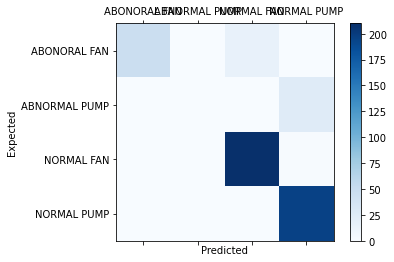

In [153]:
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_true=new_y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['ABONORAL FAN', 'ABNORMAL PUMP','NORMAL FAN','NORMAL PUMP']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


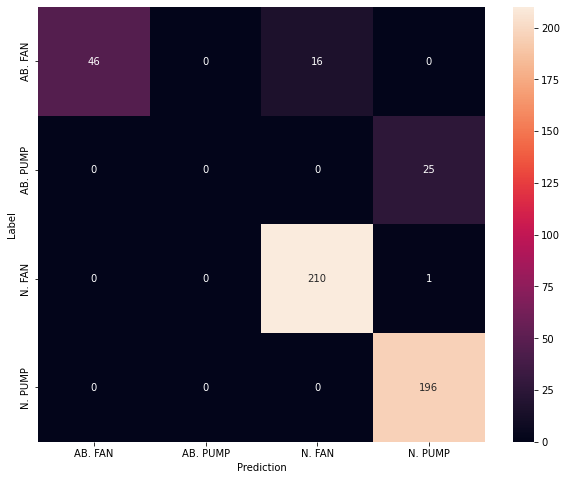

In [154]:

labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
confusion_mtx = tf.math.confusion_matrix(new_y_test, y_pred)
resampled_version=plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

AS WE SAW IN THE LAST CELLS, THE CLASS "ABNORMAL PUMP" IS NOT WELL REPRESENTED IN THE DATASET

In [155]:
import imblearn
print(imblearn.__version__)

0.8.1


In [156]:
from collections import Counter
# summarize class distribution
counter = Counter(y_original)
print(counter)

Counter({'NORMAL_FAN': 1006, 'NORMAL_PUMP': 1001, 'ABNORMAL_FAN': 351, 'ABNORMAL_PUMP': 109})


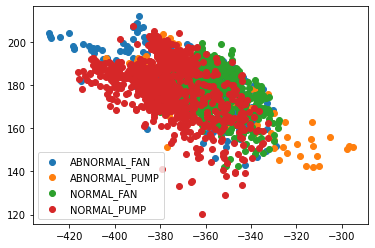

In [157]:
from numpy import where
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_original == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [158]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
resampled_X, resampled_y_original = oversample.fit_resample(X, y_original)

In [159]:
# summarize the new class distribution
counter = Counter(resampled_y_original)
print(counter)

Counter({'ABNORMAL_FAN': 1006, 'ABNORMAL_PUMP': 1006, 'NORMAL_FAN': 1006, 'NORMAL_PUMP': 1006})


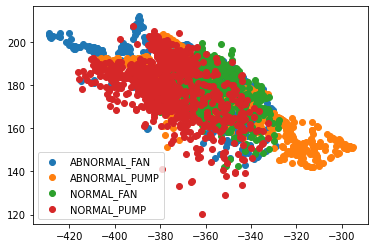

In [160]:
from numpy import where
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(resampled_y_original == label)[0]
    plt.scatter(resampled_X[row_ix, 0], resampled_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

LET'S REBUILD THE SAME MODEL AS BEFORE WITH THE RESAMPLED DATAS

In [161]:
labelencoder=LabelEncoder()
resampled_y=to_categorical(labelencoder.fit_transform(resampled_y_original))

In [162]:
### Train Test Split
r_X_train,r_X_test,r_y_train,r_y_test=train_test_split(resampled_X,resampled_y,test_size=0.2,random_state=0)
r_X_train,r_X_valid,r_y_train,r_y_valid=train_test_split(r_X_train,r_y_train,train_size=0.9,random_state=0)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,train_size=0.9,random_state=0)

In [163]:
print(r_X_train.shape,r_X_test.shape,r_X_valid.shape)

(2897, 40) (805, 40) (322, 40)


In [164]:
print(r_y_train.shape,r_y_test.shape)

(2897, 4) (805, 4)


In [165]:
num_labels=4

model2=Sequential()
###first layer
model2.add(Dense(100,input_shape=(40,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
###second layer
model2.add(Dense(200))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
###third layer
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

###final layer
model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

In [166]:
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_72 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_73 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 100)             

In [167]:
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [168]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model2.fit(r_X_train, r_y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(r_X_valid, r_y_valid), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
88/91 [============================>.] - ETA: 0s - loss: 18.9335 - accuracy: 0.2678
Epoch 00001: val_loss improved from inf to 1.39707, saving model to saved_models\audio_classification.hdf5
91/91 [==============================] - 0s 3ms/step - loss: 18.6044 - accuracy: 0.2661 - val_loss: 1.3971 - val_accuracy: 0.2484
Epoch 2/100
90/91 [============================>.] - ETA: 0s - loss: 3.7377 - accuracy: 0.2580
Epoch 00002: val_loss improved from 1.39707 to 1.38423, saving model to saved_models\audio_classification.hdf5
91/91 [==============================] - 0s 2ms/step - loss: 3.7329 - accuracy: 0.2575 - val_loss: 1.3842 - val_accuracy: 0.2609
Epoch 3/100
63/91 [===================>..........] - ETA: 0s - loss: 1.9496 - accuracy: 0.2748
Epoch 00003: val_loss did not improve from 1.38423
91/91 [==============================] - 0s 2ms/step - loss: 1.8919 - accuracy: 0.2765 - val_loss: 1.3867 - val_accuracy: 0.2547
Epoch 4/100
64/91 [====================>.........] - ETA:

Epoch 27/100
65/91 [====================>.........] - ETA: 0s - loss: 0.5507 - accuracy: 0.7428
Epoch 00027: val_loss improved from 0.42098 to 0.41274, saving model to saved_models\audio_classification.hdf5
91/91 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7453 - val_loss: 0.4127 - val_accuracy: 0.8944
Epoch 28/100
61/91 [===================>..........] - ETA: 0s - loss: 0.5122 - accuracy: 0.7679
Epoch 00028: val_loss improved from 0.41274 to 0.40690, saving model to saved_models\audio_classification.hdf5
91/91 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7673 - val_loss: 0.4069 - val_accuracy: 0.8509
Epoch 29/100
88/91 [============================>.] - ETA: 0s - loss: 0.5216 - accuracy: 0.7656
Epoch 00029: val_loss improved from 0.40690 to 0.37301, saving model to saved_models\audio_classification.hdf5
91/91 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7653 - val_loss: 0.3730 - val_accuracy:

60/91 [==================>...........] - ETA: 0s - loss: 0.3769 - accuracy: 0.8297
Epoch 00054: val_loss did not improve from 0.23595
91/91 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8374 - val_loss: 0.2572 - val_accuracy: 0.9006
Epoch 55/100
88/91 [============================>.] - ETA: 0s - loss: 0.3771 - accuracy: 0.8477
Epoch 00055: val_loss improved from 0.23595 to 0.22193, saving model to saved_models\audio_classification.hdf5
91/91 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8474 - val_loss: 0.2219 - val_accuracy: 0.9255
Epoch 56/100
86/91 [===========================>..] - ETA: 0s - loss: 0.3877 - accuracy: 0.8358
Epoch 00056: val_loss did not improve from 0.22193
91/91 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8378 - val_loss: 0.2579 - val_accuracy: 0.9224
Epoch 57/100
82/91 [==========================>...] - ETA: 0s - loss: 0.3582 - accuracy: 0.8582
Epoch 00057: val_loss did not

Epoch 83/100
89/91 [============================>.] - ETA: 0s - loss: 0.3156 - accuracy: 0.8697
Epoch 00083: val_loss did not improve from 0.16568
91/91 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8706 - val_loss: 0.1877 - val_accuracy: 0.9286
Epoch 84/100
87/91 [===========================>..] - ETA: 0s - loss: 0.3373 - accuracy: 0.8477
Epoch 00084: val_loss did not improve from 0.16568
91/91 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8474 - val_loss: 0.2384 - val_accuracy: 0.9037
Epoch 85/100
79/91 [=========================>....] - ETA: 0s - loss: 0.3074 - accuracy: 0.8718
Epoch 00085: val_loss did not improve from 0.16568
91/91 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8712 - val_loss: 0.2151 - val_accuracy: 0.9286
Epoch 86/100
85/91 [===========================>..] - ETA: 0s - loss: 0.3046 - accuracy: 0.8687
Epoch 00086: val_loss did not improve from 0.16568
91/91 [==================

In [169]:
test_accuracy=model2.evaluate(r_X_test,r_y_test,verbose=0)
print(test_accuracy[1])

0.9490683078765869


In [170]:
r_y_pred=model2.predict_classes(r_X_test)
resampled_y_pred=r_y_pred
resampled_y_pred

array([3, 0, 2, 3, 0, 3, 3, 3, 0, 0, 3, 1, 3, 1, 1, 0, 2, 3, 0, 1, 0, 3,
       3, 1, 0, 2, 3, 3, 2, 3, 0, 0, 3, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 3,
       0, 0, 1, 3, 3, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 2, 3,
       2, 2, 1, 2, 3, 0, 2, 0, 2, 3, 3, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 3,
       2, 3, 2, 2, 1, 3, 1, 3, 2, 1, 0, 0, 1, 1, 0, 2, 0, 3, 2, 2, 2, 0,
       2, 1, 1, 3, 2, 0, 3, 3, 0, 3, 1, 3, 0, 1, 1, 1, 2, 3, 1, 1, 2, 2,
       1, 0, 0, 2, 3, 2, 3, 2, 1, 1, 3, 0, 3, 2, 1, 0, 1, 0, 3, 2, 2, 2,
       2, 1, 3, 1, 0, 2, 0, 0, 2, 3, 2, 3, 0, 2, 3, 2, 0, 1, 3, 0, 2, 0,
       1, 0, 3, 1, 0, 2, 3, 1, 2, 0, 3, 3, 1, 0, 1, 2, 1, 1, 1, 2, 2, 3,
       1, 3, 1, 0, 0, 2, 3, 2, 0, 1, 2, 0, 1, 3, 2, 0, 0, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 3, 1, 3, 1, 2, 3, 3, 0, 0, 1,
       1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 3, 2, 0, 2, 3, 0, 0, 2, 2,
       0, 2, 3, 0, 0, 3, 2, 0, 2, 2, 2, 0, 3, 1, 0, 1, 1, 0, 3, 3, 2, 3,
       2, 1, 3, 2, 1, 3, 3, 3, 1, 2, 0, 3, 0, 1, 2,

In [171]:
#[1,0,0,0]---->abnormal fan------->0
#[0,1,0,0]----->abnormal pump----->1
#[0,0,1,0]---->normal fan--------->2
#[0,0,0,1]----->normal pump------->3
print(len(r_y_test))
new_r_y_test=[]
for elem in r_y_test:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        new_r_y_test.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        new_r_y_test.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        new_r_y_test.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        new_r_y_test.append(3)
        

805


Confusion matrix:
 [[187   1  13   0]
 [  0 194   0   1]
 [ 16   0 211   0]
 [  3   6   1 172]]


C:\Users\marco\AppData\Local\Temp/ipykernel_13228/399818354.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\marco\AppData\Local\Temp/ipykernel_13228/399818354.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


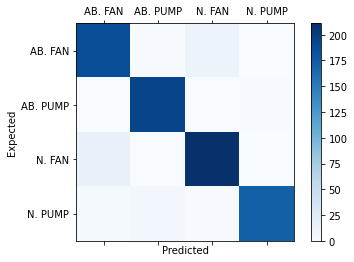

In [172]:
conf_mat = confusion_matrix(y_true=new_r_y_test, y_pred=resampled_y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


In [173]:
for filename in file_list:
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label=model2.predict_classes(mfccs_scaled_features)
    print("classe predetta: ",predicted_label)
#[1,0,0,0]---->abnormal fan------->0
#[0,1,0,0]----->abnormal pump----->1
#[0,0,1,0]---->normal fan--------->2
#[0,0,0,1]----->normal pump------->3

#PREDICTED CLASS 0 (ABNORMAl FAN)---------->CORRECT PREDICTION
#PREDICTED CLASS 2 (NORMAl FAN)---------->CORRECT PREDICTION
#PREDICTED CLASS 3 (NORMAL PUMP)---------->CORRECT PREDICTION
#PREDICTED CLASS 1 (ABNORMAL PUMP)---------->CORRECT PREDICTION

classe predetta:  [0]
classe predetta:  [2]
classe predetta:  [3]
classe predetta:  [1]


A BETTER CONFUSION MATRIX TO SEE THE FINAL RESULTS

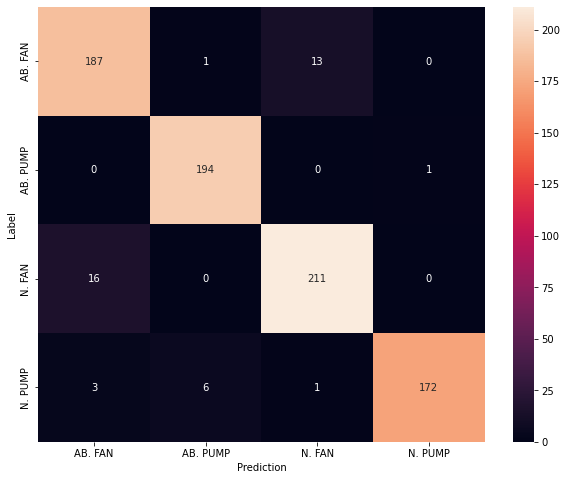

In [174]:

labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
confusion_mtx = tf.math.confusion_matrix(new_r_y_test,resampled_y_pred)
resampled_version=plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

IN CONCLUSION, LET'S VISUALIZE OTHER METRICS TO SEE IF THE MODEL IS GOOD 

In [175]:
print("accuracy:         ",accuracy_score(new_r_y_test, resampled_y_pred))
print("f1 score:         ",f1_score(new_r_y_test, resampled_y_pred, average='weighted'))
print("precision:        ",precision_score(new_r_y_test, resampled_y_pred, average='weighted'))
print("recall:           ",recall_score(new_r_y_test, resampled_y_pred, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(new_r_y_test,resampled_y_pred, pos_label=2)
print("AUC:              ",metrics.auc(fpr, tpr))

accuracy:          0.9490683229813665
f1 score:          0.949139752126925
precision:         0.9496815561572578
recall:            0.9490683229813665
AUC:               0.6516317851317774


THE RESULTS ARE GOOD. LET'S TRY(!!!) TO IMPROVE OUR MODEL

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


#the split works with 1d labels so I have to convert from [a,a,a,a] to n. I will reuse some code used before:

new_resampled_y=[]
for elem in resampled_y:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        new_resampled_y.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        new_resampled_y.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        new_resampled_y.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        new_resampled_y.append(3)

In [65]:
list_accuracy=[]
list_f1=[]
list_precision=[]
list_recall=[]
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(resampled_X,new_resampled_y):
    new_y_test=[]
    ### Train Test Split
    ###r_X_train,r_X_test,r_y_train,r_y_test=train_test_split(resampled_X,resampled_y,test_size=0.2,random_state=0)
    r_X_train_CROSS,r_X_test_CROSS,r_y_train_CROSS,r_y_test_CROSS=train_test_split(resampled_X,resampled_y,test_size=0.2,random_state=0)
    r_X_train_CROSS,r_X_valid_CROSS,r_y_train_CROSS,r_y_valid_CROSS=train_test_split(r_X_train_CROSS,r_y_train_CROSS,train_size=0.9,random_state=0)
    num_labels=4

    model3=Sequential()
    ###first layer
    model3.add(Dense(100,input_shape=(40,)))
    model3.add(Activation('relu'))
    model3.add(Dropout(0.5))
    ###second layer
    model3.add(Dense(200))
    model3.add(Activation('relu'))
    model3.add(Dropout(0.5))
    ###third layer
    model3.add(Dense(100))
    model3.add(Activation('relu'))
    model3.add(Dropout(0.5))

    ###final layer
    model3.add(Dense(num_labels))
    model3.add(Activation('softmax'))
    
    ###compile
    model3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
    
    checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=0, save_best_only=True)
    start = datetime.now()

    model3.fit(r_X_train_CROSS, r_y_train_CROSS, batch_size=num_batch_size, epochs=num_epochs, validation_data=(r_X_valid_CROSS, r_y_valid_CROSS), callbacks=[checkpointer], verbose=0)
    
    r_y_pred=model3.predict_classes(r_X_test_CROSS)
    
    for elem in r_y_test:
        if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
            new_y_test.append(0)
        if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
            new_y_test.append(1)
        if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
            new_y_test.append(2)
        if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
            new_y_test.append(3)
            
    list_accuracy.append(accuracy_score(new_y_test, r_y_pred))
    list_f1.append(f1_score(new_y_test, r_y_pred, average='weighted'))
    list_precision.append(precision_score(new_y_test, r_y_pred, average='weighted'))
    list_recall.append(recall_score(new_y_test, r_y_pred, average='weighted'))
    print("X")

X
X
X
X
X
X
X
X
X
X


In [66]:
print("accuracy:         ",np.mean(list_accuracy))
print("f1 score:         ",np.mean(list_f1))
print("precision:        ",np.mean(list_precision))
print("recall:           ",np.mean(list_recall))

accuracy:          0.9329192546583851
f1 score:          0.9328677943293796
precision:         0.9355796170432165
recall:            0.9329192546583851


THE RESULTS ARE NOT CHANGE. SO WE CAN SAY THAT IN THIS CASE THE 10-FOLD CROSS VALIDATION DID NOT BRING ANY IMPROVEMENT TO OUR MODEL

HYPERPARAMETERS TUNING

In [67]:
def define_model():
    model=Sequential()
    ###first layer
    model.add(Dense(100,input_shape=(40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    ###second layer
    model.add(Dense(200))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    ###third layer
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    ###final layer
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    
    ###compile
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
    return model

In [68]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
tuned_model=KerasClassifier(build_fn=define_model)

In [69]:
print(r_y_train)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [70]:
from sklearn.model_selection import GridSearchCV
# define the grid search parameters
batch_size = [12, 16, 20, 24, 28, 32, 36, 40]
epochs = [10, 50, 100, 150, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=tuned_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(r_X_train, r_y_train)

Epoch 1/200
73/73 [==============================] - 0s 4ms/step - loss: 22.5597 - accuracy: 0.2568
Epoch 2/200
73/73 [==============================] - 0s 6ms/step - loss: 4.5219 - accuracy: 0.2544
Epoch 3/200
73/73 [==============================] - 0s 4ms/step - loss: 2.2664 - accuracy: 0.2596
Epoch 4/200
73/73 [==============================] - 0s 3ms/step - loss: 1.6565 - accuracy: 0.2509
Epoch 5/200
73/73 [==============================] - 0s 6ms/step - loss: 1.5487 - accuracy: 0.2599
Epoch 6/200
73/73 [==============================] - 0s 3ms/step - loss: 1.4496 - accuracy: 0.2710
Epoch 7/200
73/73 [==============================] - 0s 4ms/step - loss: 1.4196 - accuracy: 0.2710
Epoch 8/200
73/73 [==============================] - 0s 6ms/step - loss: 1.4104 - accuracy: 0.2806
Epoch 9/200
73/73 [==============================] - 0s 4ms/step - loss: 1.3942 - accuracy: 0.2841
Epoch 10/200
73/73 [==============================] - 0s 4ms/step - loss: 1.3805 - accuracy: 0.2889
Epoch 11

73/73 [==============================] - 0s 5ms/step - loss: 0.3494 - accuracy: 0.8478: 0s - loss: 0.3343 - accuracy
Epoch 83/200
73/73 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8519
Epoch 84/200
73/73 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.8533
Epoch 85/200
73/73 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.8681
Epoch 86/200
73/73 [==============================] - 0s 4ms/step - loss: 0.3499 - accuracy: 0.8540
Epoch 87/200
73/73 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.8616
Epoch 88/200
73/73 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.8750: 0s - loss: 0.3020 - accuracy: 0.
Epoch 89/200
73/73 [==============================] - 0s 7ms/step - loss: 0.3365 - accuracy: 0.8557
Epoch 90/200
73/73 [==============================] - 1s 7ms/step - loss: 0.3129 - accuracy: 0.8657
Epoch 91/200
73/73 [=============================

Epoch 162/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.9092
Epoch 163/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2372 - accuracy: 0.9140
Epoch 164/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2335 - accuracy: 0.8975
Epoch 165/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.8937
Epoch 166/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2594 - accuracy: 0.8916
Epoch 167/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2510 - accuracy: 0.9027
Epoch 168/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 0.8954
Epoch 169/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.9027
Epoch 170/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2563 - accuracy: 0.8971
Epoch 171/200
73/73 [==============================] - 0s 6ms/step - loss: 0.2296 - accurac

In [71]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.943738 using {'batch_size': 40, 'epochs': 200}
0.595764 (0.054356) with: {'batch_size': 12, 'epochs': 10}
0.844317 (0.050192) with: {'batch_size': 12, 'epochs': 50}
0.873666 (0.020753) with: {'batch_size': 12, 'epochs': 100}
0.916457 (0.017319) with: {'batch_size': 12, 'epochs': 150}
0.909211 (0.011523) with: {'batch_size': 12, 'epochs': 200}
0.340079 (0.148999) with: {'batch_size': 16, 'epochs': 10}
0.865721 (0.012482) with: {'batch_size': 16, 'epochs': 50}
0.921306 (0.017864) with: {'batch_size': 16, 'epochs': 100}
0.924752 (0.009778) with: {'batch_size': 16, 'epochs': 150}
0.909897 (0.022462) with: {'batch_size': 16, 'epochs': 200}
0.377933 (0.188843) with: {'batch_size': 20, 'epochs': 10}
0.815309 (0.045832) with: {'batch_size': 20, 'epochs': 50}
0.906433 (0.046444) with: {'batch_size': 20, 'epochs': 100}
0.908866 (0.017296) with: {'batch_size': 20, 'epochs': 150}
0.909913 (0.018857) with: {'batch_size': 20, 'epochs': 200}
0.408635 (0.133553) with: {'batch_size': 24, 'epoch

LET'S TUNE ALSE THE OPTIMIZATION ALGORITHMS

Now let's try to use the "best" optimization algorithm. Let's use as epoch and batch_size parameter the est ones we found previously (150 and 36)

In [72]:
def define_model_optimized(optimizer='adam'):
    model=Sequential()
    ###first layer
    model.add(Dense(100,input_shape=(40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    ###second layer
    model.add(Dense(200))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    ###third layer
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    ###final layer
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    
    ###compile
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    return model

In [73]:
# create model
new_tuned_model = KerasClassifier(build_fn=define_model_optimized, epochs=150, batch_size=36, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=new_tuned_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(r_X_train, r_y_train)

In [74]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.938900 using {'optimizer': 'Nadam'}
0.234386 (0.014858) with: {'optimizer': 'SGD'}
0.933038 (0.012298) with: {'optimizer': 'RMSprop'}
0.266143 (0.012401) with: {'optimizer': 'Adagrad'}
0.241991 (0.038212) with: {'optimizer': 'Adadelta'}
0.931311 (0.006319) with: {'optimizer': 'Adam'}
0.933381 (0.005142) with: {'optimizer': 'Adamax'}
0.938900 (0.006119) with: {'optimizer': 'Nadam'}


OPTIMIZATION OF ACTIVATION FUNCTION

In [75]:
def define_model_optimized_act(activation='relu',final_activation='softmax'):
    model=Sequential()
    ###first layer
    model.add(Dense(100,input_shape=(40,)))
    model.add(Activation(activation))
    model.add(Dropout(0.5))
    ###second layer
    model.add(Dense(200))
    model.add(Activation(activation))
    model.add(Dropout(0.5))
    ###third layer
    model.add(Dense(100))
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    ###final layer
    model.add(Dense(num_labels))
    model.add(Activation(final_activation))
    
    ###compile
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')
    return model

In [76]:
# create model
new_tuned_model_2 = KerasClassifier(build_fn=define_model_optimized_act, epochs=150, batch_size=36, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation,final_activation=activation)
grid = GridSearchCV(estimator=new_tuned_model_2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(r_X_train, r_y_train)

In [77]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.958231 using {'activation': 'softplus', 'final_activation': 'softmax'}
0.320051 (0.133159) with: {'activation': 'softmax', 'final_activation': 'softmax'}
0.402778 (0.108243) with: {'activation': 'softmax', 'final_activation': 'softplus'}
0.256821 (0.012520) with: {'activation': 'softmax', 'final_activation': 'softsign'}
0.258198 (0.005948) with: {'activation': 'softmax', 'final_activation': 'relu'}
0.243708 (0.022365) with: {'activation': 'softmax', 'final_activation': 'tanh'}
0.407698 (0.119890) with: {'activation': 'softmax', 'final_activation': 'sigmoid'}
0.471535 (0.037876) with: {'activation': 'softmax', 'final_activation': 'hard_sigmoid'}
0.240588 (0.012217) with: {'activation': 'softmax', 'final_activation': 'linear'}
0.958231 (0.004668) with: {'activation': 'softplus', 'final_activation': 'softmax'}
0.906106 (0.011294) with: {'activation': 'softplus', 'final_activation': 'softplus'}
0.257850 (0.006270) with: {'activation': 'softplus', 'final_activation': 'softsign'}
0.2

SO THE CONFIGURATION WIT EPOCH=150, BATCH_SIZE=36, ACTIVATION=SOFTPLUS (EXCEPT FROM THE LAST ONE SOFTMAX) AND Adam AS OPTIMIZER SHOULD BE THE BEST

In [78]:
num_labels=4

final_model=Sequential()
###first layer
final_model.add(Dense(100,input_shape=(40,)))
final_model.add(Activation('softplus'))
final_model.add(Dropout(0.5))
###second layfinal_er
final_model.add(Dense(200))
final_model.add(Activation('softplus'))
final_model.add(Dropout(0.5))
###third layer
final_model.add(Dense(100))
final_model.add(Activation('softplus'))
final_model.add(Dropout(0.5))

###final layer
final_model.add(Dense(num_labels))
final_model.add(Activation('softmax'))

In [79]:
final_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [80]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 150
num_batch_size = 36

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

final_model.fit(r_X_train, r_y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(r_X_valid, r_y_valid), callbacks=[checkpointer], verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150

Epoch 00001: val_loss improved from inf to 1.37444, saving model to saved_models\audio_classification.hdf5
81/81 - 0s - loss: 26.4110 - accuracy: 0.2523 - val_loss: 1.3744 - val_accuracy: 0.2764
Epoch 2/150

Epoch 00002: val_loss did not improve from 1.37444
81/81 - 0s - loss: 5.2281 - accuracy: 0.2741 - val_loss: 1.3788 - val_accuracy: 0.2764
Epoch 3/150

Epoch 00003: val_loss did not improve from 1.37444
81/81 - 0s - loss: 2.5568 - accuracy: 0.2661 - val_loss: 1.3828 - val_accuracy: 0.2640
Epoch 4/150

Epoch 00004: val_loss did not improve from 1.37444
81/81 - 0s - loss: 1.8101 - accuracy: 0.2644 - val_loss: 1.3837 - val_accuracy: 0.2857
Epoch 5/150

Epoch 00005: val_loss did not improve from 1.37444
81/81 - 0s - loss: 1.5774 - accuracy: 0.2509 - val_loss: 1.3842 - val_accuracy: 0.2671
Epoch 6/150

Epoch 00006: val_loss did not improve from 1.37444
81/81 - 0s - loss: 1.4693 - accuracy: 0.2824 - val_loss: 1.3846 - val_accuracy: 0.2702
Epoch 7/150

Epoch 00007: val_loss di

Epoch 43/150

Epoch 00043: val_loss did not improve from 0.29272
81/81 - 0s - loss: 0.4496 - accuracy: 0.7970 - val_loss: 0.3038 - val_accuracy: 0.8913
Epoch 44/150

Epoch 00044: val_loss did not improve from 0.29272
81/81 - 0s - loss: 0.4229 - accuracy: 0.8088 - val_loss: 0.2957 - val_accuracy: 0.8820
Epoch 45/150

Epoch 00045: val_loss improved from 0.29272 to 0.26500, saving model to saved_models\audio_classification.hdf5
81/81 - 0s - loss: 0.4090 - accuracy: 0.8088 - val_loss: 0.2650 - val_accuracy: 0.9130
Epoch 46/150

Epoch 00046: val_loss did not improve from 0.26500
81/81 - 0s - loss: 0.4106 - accuracy: 0.8164 - val_loss: 0.2655 - val_accuracy: 0.8913
Epoch 47/150

Epoch 00047: val_loss did not improve from 0.26500
81/81 - 0s - loss: 0.4162 - accuracy: 0.8053 - val_loss: 0.3105 - val_accuracy: 0.8882
Epoch 48/150

Epoch 00048: val_loss improved from 0.26500 to 0.24919, saving model to saved_models\audio_classification.hdf5
81/81 - 0s - loss: 0.4075 - accuracy: 0.8208 - val_loss

Epoch 93/150

Epoch 00093: val_loss did not improve from 0.13960
81/81 - 0s - loss: 0.2269 - accuracy: 0.9116 - val_loss: 0.1558 - val_accuracy: 0.9348
Epoch 94/150

Epoch 00094: val_loss improved from 0.13960 to 0.13435, saving model to saved_models\audio_classification.hdf5
81/81 - 0s - loss: 0.2132 - accuracy: 0.9230 - val_loss: 0.1343 - val_accuracy: 0.9503
Epoch 95/150

Epoch 00095: val_loss did not improve from 0.13435
81/81 - 0s - loss: 0.2218 - accuracy: 0.9130 - val_loss: 0.2031 - val_accuracy: 0.9286
Epoch 96/150

Epoch 00096: val_loss did not improve from 0.13435
81/81 - 0s - loss: 0.2103 - accuracy: 0.9154 - val_loss: 0.1637 - val_accuracy: 0.9379
Epoch 97/150

Epoch 00097: val_loss did not improve from 0.13435
81/81 - 0s - loss: 0.2163 - accuracy: 0.9106 - val_loss: 0.1345 - val_accuracy: 0.9534
Epoch 98/150

Epoch 00098: val_loss did not improve from 0.13435
81/81 - 0s - loss: 0.2033 - accuracy: 0.9185 - val_loss: 0.1349 - val_accuracy: 0.9565
Epoch 99/150

Epoch 00099: v

Epoch 144/150

Epoch 00144: val_loss did not improve from 0.10773
81/81 - 0s - loss: 0.1749 - accuracy: 0.9330 - val_loss: 0.1175 - val_accuracy: 0.9627
Epoch 145/150

Epoch 00145: val_loss did not improve from 0.10773
81/81 - 0s - loss: 0.1870 - accuracy: 0.9282 - val_loss: 0.1352 - val_accuracy: 0.9472
Epoch 146/150

Epoch 00146: val_loss did not improve from 0.10773
81/81 - 0s - loss: 0.2095 - accuracy: 0.9210 - val_loss: 0.1299 - val_accuracy: 0.9379
Epoch 147/150

Epoch 00147: val_loss did not improve from 0.10773
81/81 - 0s - loss: 0.1831 - accuracy: 0.9330 - val_loss: 0.1219 - val_accuracy: 0.9596
Epoch 148/150

Epoch 00148: val_loss did not improve from 0.10773
81/81 - 0s - loss: 0.1618 - accuracy: 0.9406 - val_loss: 0.1124 - val_accuracy: 0.9565
Epoch 149/150

Epoch 00149: val_loss did not improve from 0.10773
81/81 - 0s - loss: 0.1715 - accuracy: 0.9351 - val_loss: 0.1301 - val_accuracy: 0.9565
Epoch 150/150

Epoch 00150: val_loss did not improve from 0.10773
81/81 - 0s - los

In [81]:
test_accuracy=final_model.evaluate(r_X_test,r_y_test,verbose=0)
print(test_accuracy[1])

0.9416149258613586


In [82]:
r_y_pred=final_model.predict_classes(r_X_test)

In [83]:
new_y_test=[]
for elem in r_y_test:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        new_y_test.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        new_y_test.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        new_y_test.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        new_y_test.append(3)

In [84]:
print("accuracy:         ",accuracy_score(new_y_test, r_y_pred))
print("f1 score:         ",f1_score(new_y_test, r_y_pred, average='weighted'))
print("precision:        ",precision_score(new_y_test, r_y_pred, average='weighted'))
print("recall:           ",recall_score(new_y_test, r_y_pred, average='weighted'))

accuracy:          0.9416149068322981
f1 score:          0.9417531029536097
precision:         0.9461473049194346
recall:            0.9416149068322981


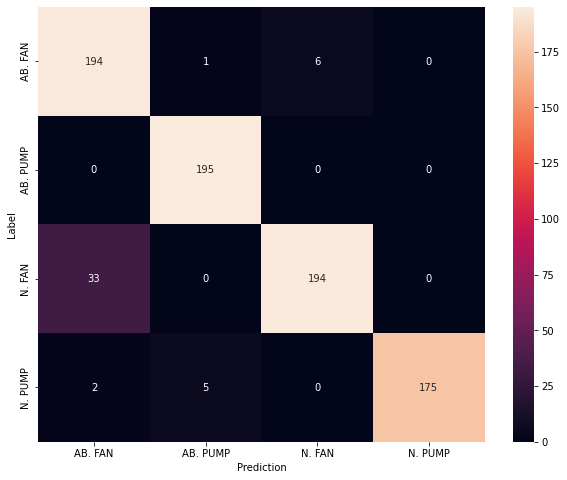

In [85]:
labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
confusion_mtx = tf.math.confusion_matrix(new_y_test, r_y_pred)
final_matrix=plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

COMPARISON BETWEEN NORMAL RESAMPLED VERSION WITH REASMPLED VERSION WITH OPTIMIZATION

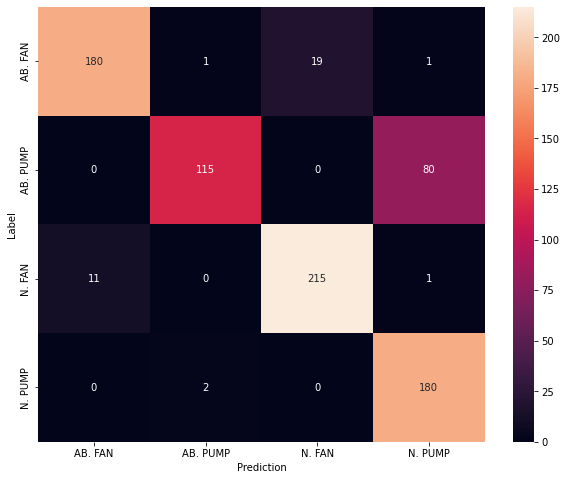

In [86]:
resampled_version

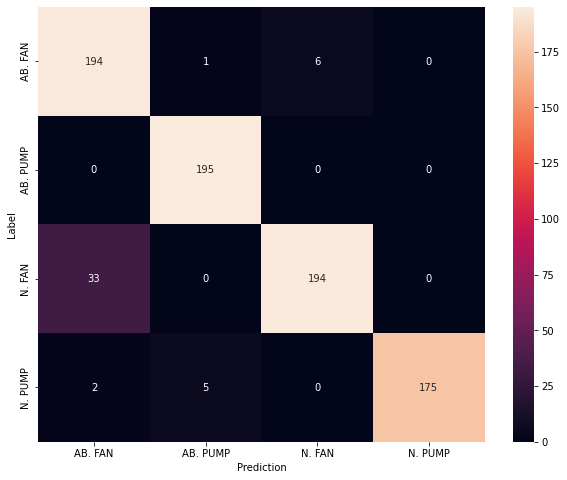

In [87]:
final_matrix

In [88]:
for filename in file_list:
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label=final_model.predict_classes(mfccs_scaled_features)
    print("classe predetta: ",predicted_label)
#[1,0,0,0]---->abnormal fan------->0
#[0,1,0,0]----->abnormal pump----->1
#[0,0,1,0]---->normal fan--------->2
#[0,0,0,1]----->normal pump------->3

#PREDICTED CLASS 0 (ABNORMAl FAN)---------->CORRECT PREDICTION
#PREDICTED CLASS 2 (NORMAl FAN)---------->CORRECT PREDICTION
#PREDICTED CLASS 3 (NORMAL PUMP)---------->CORRECT PREDICTION
#PREDICTED CLASS 1 (ABNORMAL PUMP)---------->CORRECT PREDICTION

classe predetta:  [0]
classe predetta:  [2]
classe predetta:  [3]
classe predetta:  [1]


# SUMMARY ABOUT THE NEURAL NETWORK PART

WE HAVE ACHIVED A GOOD RESULT: WE BUILT A MODEL THAT CAN PREDICT IN THE CORRECT WAY A CLASS WITH THE 95% (IN SOME EXECUTIONS ALSO 97%) OF ACCURACY.

FIRST WE TRIED TO TRAIN A MODEL WITH THE ORIGINAL DATASET (SO NOT RESAMPLED) WHERE THE CLASS ABNORMAL FAN AND ESPECIALLY ABONORMAL PUMP WERE LESS RAPRESENTED RESPECT TO THE OTHERS 2. THE ACCURACY WAS STILL HIGH (90%) BUT AS WE SAW IN CLASS, THIS METRIC CAN FAIL VERY EASILY.

FOR THIS REASON I USED SMOTE TO RESAMPLE THE DATASET. WE RE-USE THE SAME MODEL AS BEFOR AND WE ACHIVED GOOD RESULTS: ALL THE METRICS EXAMINATED (ACCURACY, RECALL, PRECISION AND F1 SCORE) WERE ABOVE THE 93%.

AFTER THAT I USED RUN THE SAME MODEL AS BEFORE WITH THE 10-FOLD CROSS VALIDATION BUT THE RESULATS DID NOT CHANGED: ALL THE METRICS WERE AROUND THE 93%

THE LAST IMPROVMENT I TRIED WAS THE GRID SEARCH FOR HYPERPARAMETERS. WITH IT, I FOUND THE BEST CONFIGURATION OF BATCH_SIZE, NUMBER OF EPOCHS, ACTIVATION FUNCTION OF THE NEURONS AND THE RIGHT OPTIMIZATION ALGORITHM TO USE. WITH THESE NEW PARAMETERS APPLIED TO THE "final_model" WE ACHIVED AN ACCURACY OF 95%

NB: SINCE EACH EXECUTION IS INDEPENDET FROM THE OTHERS, THE BEST PARAMETERS (BATCH_SIZE, EPOCHS, ACTIVATION FUNCTION AND OPTIMIZATION ALGORITHM) COULD SLIGHTLY CHANGE

# SVM

In [89]:
#Importing the necessary packages and libaries
from sklearn import svm, datasets

In [90]:
#I will use the resample dataset
print(resampled_X.shape,resampled_y.shape)

(4024, 40) (4024, 4)


In [91]:
new_r_y=[]
for elem in r_y_train:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        new_r_y.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        new_r_y.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        new_r_y.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        new_r_y.append(3)
new_r_y = np.array(new_r_y)


y_test=[]
for elem in r_y_test:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        y_test.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        y_test.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        y_test.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        y_test.append(3)
y_test = np.array(y_test)

y_valid=[]
for elem in r_y_valid:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        y_valid.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        y_valid.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        y_valid.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        y_valid.append(3)
y_valid = np.array(y_valid)

In [92]:
new_r_y

array([3, 1, 1, ..., 0, 0, 3])

In [93]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(r_X_train, new_r_y)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(r_X_train,new_r_y)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(r_X_train, new_r_y)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(r_X_train, new_r_y)

In [94]:
#evaluation on validation set via score method
print(linear.score(r_X_valid, y_valid))
print(rbf.score(r_X_valid, y_valid))
print(poly.score(r_X_valid, y_valid))
print(sig.score(r_X_valid, y_valid))

0.9565217391304348
0.4813664596273292
0.6925465838509317
0.38509316770186336


In [95]:
#Let's predict
linear_pred = linear.predict(r_X_test)
poly_pred = poly.predict(r_X_test)
rbf_pred = rbf.predict(r_X_test)
sig_pred = sig.predict(r_X_test)

In [96]:
#summarize results
print("LINEAR METRICS")
print("accuracy:         ",accuracy_score(y_test, linear_pred))
print("f1 score:         ",f1_score(y_test, linear_pred, average='weighted'))
print("precision:        ",precision_score(y_test, linear_pred, average='weighted'))
print("recall:           ",recall_score(y_test, linear_pred, average='weighted'))
print("--------------------------------------------------------------------------------")
print("RADIAL BASIS METRICS")
print("accuracy:         ",accuracy_score(y_test, rbf_pred))
print("f1 score:         ",f1_score(y_test, rbf_pred, average='weighted'))
print("precision:        ",precision_score(y_test, rbf_pred, average='weighted'))
print("recall:           ",recall_score(y_test, rbf_pred, average='weighted'))
print("--------------------------------------------------------------------------------")
print("POLYNOMIAL METRICS")
print("accuracy:         ",accuracy_score(y_test, poly_pred))
print("f1 score:         ",f1_score(y_test, poly_pred, average='weighted'))
print("precision:        ",precision_score(y_test, poly_pred, average='weighted'))
print("recall:           ",recall_score(y_test, poly_pred, average='weighted'))
print("--------------------------------------------------------------------------------")
print("SIGMOID METRICS")
print("accuracy:         ",accuracy_score(y_test, sig_pred))
print("f1 score:         ",f1_score(y_test, sig_pred, average='weighted'))
print("precision:        ",precision_score(y_test, sig_pred, average='weighted'))
print("recall:           ",recall_score(y_test, sig_pred, average='weighted'))
print("--------------------------------------------------------------------------------")

LINEAR METRICS
accuracy:          0.9440993788819876
f1 score:          0.9442150729904071
precision:         0.9451168541230608
recall:            0.9440993788819876
--------------------------------------------------------------------------------
RADIAL BASIS METRICS
accuracy:          0.4012422360248447
f1 score:          0.3546840309517459
precision:         0.5538950834393475
recall:            0.4012422360248447
--------------------------------------------------------------------------------
POLYNOMIAL METRICS
accuracy:          0.6807453416149069
f1 score:          0.6544509521655556
precision:         0.7687811475389115
recall:            0.6807453416149069
--------------------------------------------------------------------------------
SIGMOID METRICS
accuracy:          0.37515527950310557
f1 score:          0.24182420689637976
precision:         0.17884602556489806
recall:            0.37515527950310557
--------------------------------------------------------------------------

C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


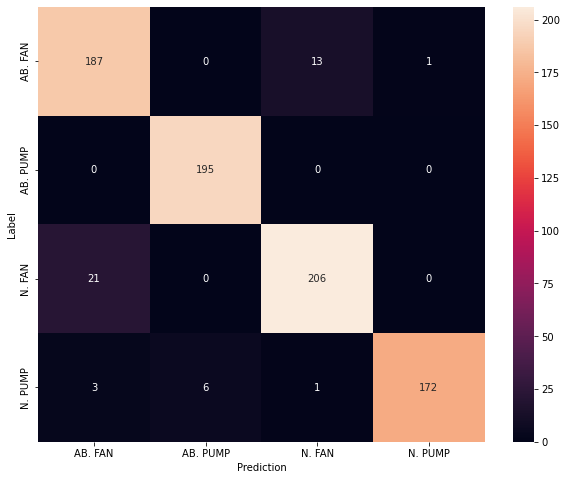

In [97]:
#LINEAR KERNEL
from sklearn.metrics import confusion_matrix
labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
confusion_mtx = confusion_matrix(y_test, linear_pred)
final_matrix=plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

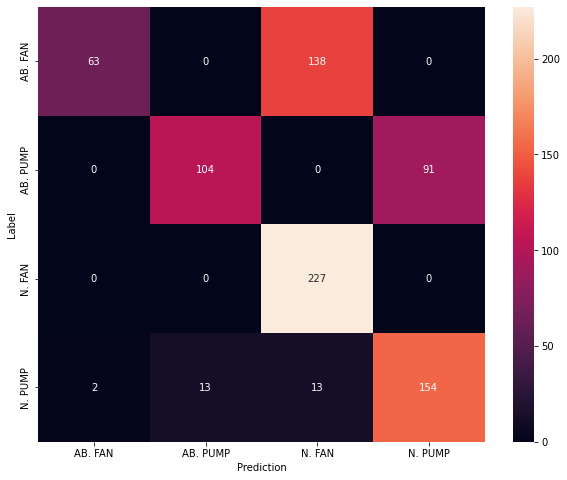

In [98]:
#POLYNOMIAL KERNEL
labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
confusion_mtx = confusion_matrix(y_test, poly_pred)
final_matrix=plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

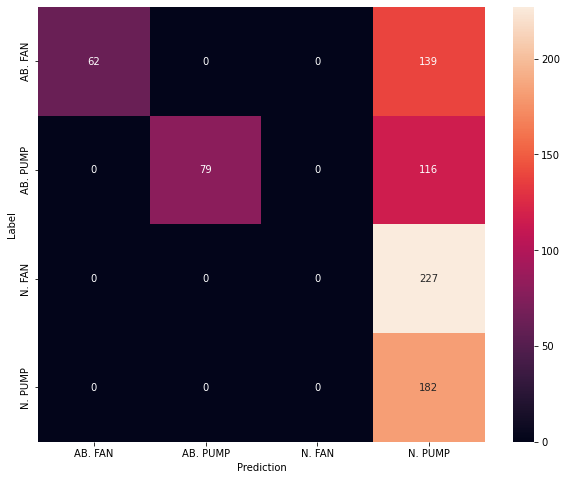

In [99]:
#RADIAL BASIS KENREL
labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
confusion_mtx = confusion_matrix(y_test, rbf_pred)
final_matrix=plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

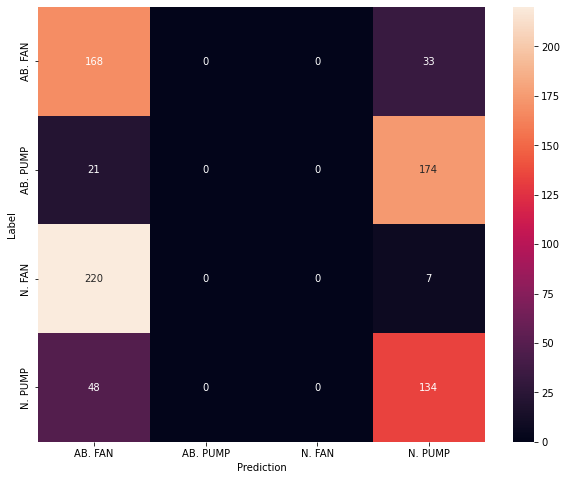

In [100]:
#SIGMOID KENREL
labels = ['AB. FAN', 'AB. PUMP','N. FAN','N. PUMP']
confusion_mtx = confusion_matrix(y_test, sig_pred)
final_matrix=plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [101]:
resampled_y
new_y=[]
for elem in resampled_y:
    if elem[0]==1 and elem[1]==0 and elem[2]==0 and elem[3]==0:
        new_y.append(0)
    if elem[0]==0 and elem[1]==1 and elem[2]==0 and elem[3]==0:
        new_y.append(1)
    if elem[0]==0 and elem[1]==0 and elem[2]==1 and elem[3]==0:
        new_y.append(2)
    if elem[0]==0 and elem[1]==0 and elem[2]==0 and elem[3]==1:
        new_y.append(3)
new_y = np.array(new_y)

LET'S REPEAT THE EXPERIMENT WITH 10-FOLD CROSS VALIDATION

In [102]:
from sklearn.model_selection import StratifiedKFold
acc_linear=[]
precision_linear=[]
recall_linear=[]
f1_linear=[]

acc_rbf=[]
precision_rbf=[]
recall_rbf=[]
f1_rbf=[]

acc_poly=[]
precision_poly=[]
recall_poly=[]
f1_poly=[]

acc_sig=[]
precision_sig=[]
recall_sig=[]
f1_sig=[]

skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(resampled_X,new_y):
    new_y_test=[]
    ### Train Test Split
    X_train,X_test,y_train,y_test=train_test_split(resampled_X, new_y, train_size=0.8, random_state = 0)
    linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
    rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
    poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
    sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)
    
    #Let's predict
    linear_pred = linear.predict(X_test)
    poly_pred = poly.predict(X_test)
    rbf_pred = rbf.predict(X_test)
    sig_pred = sig.predict(X_test)
    
    acc_linear.append(accuracy_score(y_test, linear_pred))
    f1_linear.append(f1_score(y_test, linear_pred, average='weighted'))
    precision_linear.append(precision_score(y_test, linear_pred, average='weighted'))
    recall_linear.append(recall_score(y_test, linear_pred, average='weighted'))
    
    acc_rbf.append(accuracy_score(y_test, rbf_pred))
    f1_rbf.append(f1_score(y_test, rbf_pred, average='weighted'))
    precision_rbf.append(precision_score(y_test, rbf_pred, average='weighted'))
    recall_rbf.append(recall_score(y_test, rbf_pred, average='weighted'))
    
    acc_poly.append(accuracy_score(y_test, poly_pred))
    f1_poly.append(f1_score(y_test, poly_pred, average='weighted'))
    precision_poly.append(precision_score(y_test, poly_pred, average='weighted'))
    recall_poly.append(recall_score(y_test, poly_pred, average='weighted'))
    
    acc_sig.append(accuracy_score(y_test, sig_pred))
    f1_sig.append(f1_score(y_test, sig_pred, average='weighted'))
    precision_sig.append(precision_score(y_test, sig_pred, average='weighted'))
    recall_sig.append(recall_score(y_test, sig_pred, average='weighted'))
    
    print("X")

C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X
X


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
#summarize results
print("LINEAR METRICS")
print("accuracy:         ",np.mean(acc_linear))
print("f1 score:         ",np.mean(f1_linear))
print("precision:        ",np.mean(precision_linear))
print("recall:           ",np.mean(recall_linear))
print("--------------------------------------------------------------------------------")
print("RADIAL BASIS METRICS")
print("accuracy:         ",np.mean(acc_rbf))
print("f1 score:         ",np.mean(f1_rbf))
print("precision:        ",np.mean(precision_rbf))
print("recall:           ",np.mean(recall_rbf))
print("--------------------------------------------------------------------------------")
print("POLYNOMIAL METRICS")
print("accuracy:         ",np.mean(acc_poly))
print("f1 score:         ",np.mean(f1_poly))
print("precision:        ",np.mean(precision_poly))
print("recall:           ",np.mean(recall_poly))
print("--------------------------------------------------------------------------------")
print("SIGMOID METRICS")
print("accuracy:         ",np.mean(acc_sig))
print("f1 score:         ",np.mean(f1_sig))
print("precision:        ",np.mean(precision_sig))
print("recall:           ",np.mean(recall_sig))
print("--------------------------------------------------------------------------------")

LINEAR METRICS
accuracy:          0.9453416149068323
f1 score:          0.945386175152635
precision:         0.946000234151861
recall:            0.9453416149068323
--------------------------------------------------------------------------------
RADIAL BASIS METRICS
accuracy:          0.4111801242236025
f1 score:          0.36539391599267596
precision:         0.55465081048326
recall:            0.4111801242236025
--------------------------------------------------------------------------------
POLYNOMIAL METRICS
accuracy:          0.6931677018633541
f1 score:          0.6671513050568671
precision:         0.7781157415812043
recall:            0.6931677018633541
--------------------------------------------------------------------------------
SIGMOID METRICS
accuracy:          0.3527950310559006
f1 score:          0.2324549267595223
precision:         0.24557806130948126
recall:            0.3527950310559006
--------------------------------------------------------------------------------

THE ONLY SVM WITH GOOD RESULTS IS THE ONE WITHE THE LINEAR KERNEL, WICH HAS ALL THE METRICS OVER THE 94%

# CONCLUSION

THE PERFORMANCE OF BOTH NEURAL NETWORK AND SVM (LINEAR KERNEL) ARE QUITE GOOD. MAYBE THE NEURAL NETWORK (WITH TUNING) HAS A LITTLE BETTER RESULTS (95/96 % OF SUCCESS) RESPTECT TO THE SVM (94%) BUT THE DIFFERENCE IS SO SMALL THAT WE COULD USE ONE OR ANOTHER WITH MORE OR LESS THE SAME RESULTS